In [ ]:
'''
In version1 we used Linear Regression from sk learn
but our mean square error is high.. multiple reasons for it..

1st reason: our dataset has multiple features, and all features have their own ranges
            so model gives more weightage to high numbers columns/features. but maybe 
            we have different units in different features, thats why some features has
            larger number ranges and some smaller.. but as model doesn't care about units
        solution: so we have to scale them. different scaling solutions out there
            1. z-schale (standard) scaling
            2. max-min scaling

2nd reason: maybe model this model doesn't suit. different models are
    1. decission tree regressor: (different subsets for different ranges)
    2. random forest regressor: (multiple decission trees, output is average of all trees)
    3. gradient boosting regressor: (sequence of trees, one tree output as input to other tree<it
         will solve issue of previous one>)
  we can compare mse of different models, to choose which one is solving best.
    
    we can use this models in classifications as well.

    
In this version following things changed:
    1. added scaling on x and y, but no much change or mse
'''

"\nIn version1 we used Linear Regression from sk learn\nbut our mean square error is high.. multiple reasons for it..\n\n1st reason: our dataset has multiple features, and all features have their own ranges\n            so model gives more weightage to high numbers columns/features. but maybe \n            we have different units in different features, thats why some features has\n            larger number ranges and some smaller.. but as model doesn't care about units\n        solution: so we have to scale them. different scaling solutions out there\n            1. z-schale (standard) scaling\n            2. max-min scaling\n\n2nd reason: maybe model this model doesn't suit. different models are\n    1. decission tree regressor: (different subsets for different ranges)\n    2. random forest regressor: (multiple decission trees, output is average of all trees)\n    3. gradient boosting regressor: (sequence of trees, one tree output as input to other tree<it\n         will solve issue o

In [1]:
import pandas as pd

housing_df = pd.read_csv("DataSets/USA_Housing.csv")

print('--'*25)
print(f"USA Housing DataSet : (rows, cols) = {housing_df.shape}")
print('--'*25)

print("Info: ")
housing_df.info()

print("\nTop 5 rows: ")
housing_df.head()

--------------------------------------------------
USA Housing DataSet : (rows, cols) = (5000, 6)
--------------------------------------------------
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area Income          5000 non-null   float64
 1   Area House Age       5000 non-null   float64
 2   Area No of Rooms     5000 non-null   float64
 3   Area No of Bedrooms  5000 non-null   float64
 4   Area Population      5000 non-null   float64
 5   Price                5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB

Top 5 rows: 


,Area Income,Area House Age,Area No of Rooms,Area No of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [2]:
#Check null rows
housing_df.isnull().sum()

Area Income            0
Area House Age         0
Area No of Rooms       0
Area No of Bedrooms    0
Area Population        0
Price                  0
dtype: int64

In [3]:
#Get 5 number summary
housing_df.describe()

,Area Income,Area House Age,Area No of Rooms,Area No of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split data
x = housing_df.drop('Price', axis=1)
y = housing_df[['Price']]   # Make y a DataFrame for consistency

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# 2. Initialize scalers
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# 3. Fit only on training data, then transform
x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

x_train_scaled


array([[ 0.05569623,  0.65886183, -0.86300913,  0.29911519,  0.06391981],
       [-0.05545522, -0.58559522,  2.37598858,  1.2000951 ,  0.69883088],
       [-1.11165023, -0.48032202,  0.13621855,  1.73581289,  1.14379364],
       ...,
       [-1.20704442, -2.26895761, -0.11765963, -1.34862286,  2.71900465],
       [-0.50898476, -0.03604344, -1.07361484,  0.11242565, -0.34813857],
       [ 0.62279188,  1.69958661,  1.456617  ,  0.29911519,  2.01048875]],
      shape=(4000, 5))

In [8]:
# 2. Fit
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train_scaled, y_train_scaled)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# 3. Predict
# Predict on *scaled* test data
y_pred_scaled = lin_reg.predict(x_test_scaled)

# Inverse transform predictions to original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Reshape temporarily for transform, then flatten again
y_pred

array([1257919.72924301,  822112.41868735, 1740669.05869489,
        972452.1292679 ,  993422.26329857,  644126.0741691 ,
       1073911.79097547,  856584.00208545, 1445318.25527745,
       1204342.19071555, 1455792.46233227, 1298556.65691772,
       1735924.33854645, 1336925.77593201, 1387637.43241549,
       1222403.77757881,  613786.28673694,  963933.54403071,
       1221197.3306128 , 1198071.57580528,  505861.89541351,
       1769106.54726618, 1853881.16845505, 1200369.50514872,
       1065129.128459  , 1812033.73048189, 1768686.47104279,
       1439920.83823815, 1387251.99669645, 1541178.39227178,
        726418.80525577, 1754497.60914296, 1462185.72661593,
       1025600.16064304, 1284926.86862697,  917454.59581468,
       1187046.94951817,  999330.91123323, 1329536.63408991,
        782191.60431831, 1393272.03057348,  578216.88372038,
        822643.37151071, 1895533.11423655, 1672019.84904556,
        966926.45430155, 1129674.5562168 ,  792797.75924269,
       1161057.18404074,

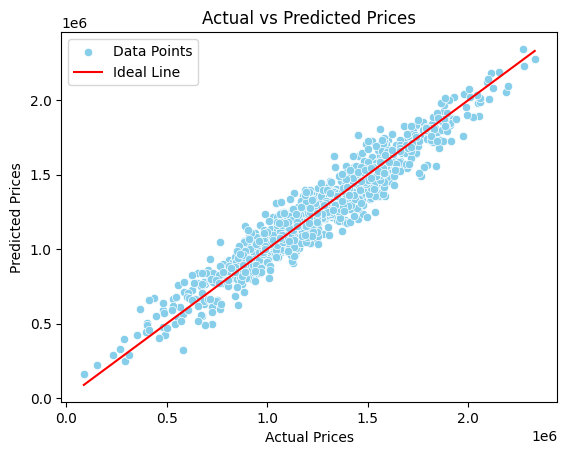

In [16]:
# lets draw scatterplot with line
# for linear regression we have a line across data points
import seaborn as sns
import matplotlib.pyplot as plt

actual = y_test['Price'].values.ravel()  # Flatten to 1D array of original actual prices
predicted = y_pred.ravel()

sns.scatterplot(
    x=actual, 
    y=predicted, 
    color="skyblue", 
    label="Data Points"
)
min_val = min(actual)
max_val = max(actual)
plt.plot([min_val, max_val], [min_val, max_val], color="red", label="Ideal Line")

# Add labels for clarity
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()

# Display the plot
plt.show()


In [17]:
print("+-----------------+-----------------+------------+")
print("|  Actual Value   | Predicted Value |    Diff    |")
print("+-----------------+-----------------+------------+")

for i in range(len(y_test)):
    actual = y_test['Price'].iloc[i]      # positional access for pandas Series
    pred = y_pred[i]             # numpy array access
    diff = actual - pred
    print(f"| {actual:<15.2f} | {pred:<15.2f} | {diff:<10.2f} |")

print("+-----------------+-----------------+------------+")


+-----------------+-----------------+------------+
|  Actual Value   | Predicted Value |    Diff    |
+-----------------+-----------------+------------+
| 1251688.62      | 1257919.73      | -6231.11   |
| 873048.32       | 822112.42       | 50935.90   |
| 1696977.66      | 1740669.06      | -43691.40  |
| 1063964.29      | 972452.13       | 91512.16   |
| 948788.28       | 993422.26       | -44633.99  |
| 730043.65       | 644126.07       | 85917.57   |
| 1166925.15      | 1073911.79      | 93013.36   |
| 705444.12       | 856584.00       | -151139.89 |
| 1499988.88      | 1445318.26      | 54670.62   |
| 1288199.15      | 1204342.19      | 83856.96   |
| 1441736.76      | 1455792.46      | -14055.70  |
| 1279681.15      | 1298556.66      | -18875.50  |
| 1754969.16      | 1735924.34      | 19044.82   |
| 1511653.46      | 1336925.78      | 174727.68  |
| 1441956.20      | 1387637.43      | 54318.77   |
| 1119992.62      | 1222403.78      | -102411.16 |
| 727866.53       | 613786.29  

In [19]:
# Residual Analysis

residual = y_test['Price'] - y_pred
residual

1718     -6231.113243
2511     50935.900913
345     -43691.395695
2521     91512.158732
54      -44633.987599
            ...      
3900      8578.803011
3753   -104601.289622
3582     38997.150463
2392   -155113.478262
3343     90915.992341
Name: Price, Length: 1000, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

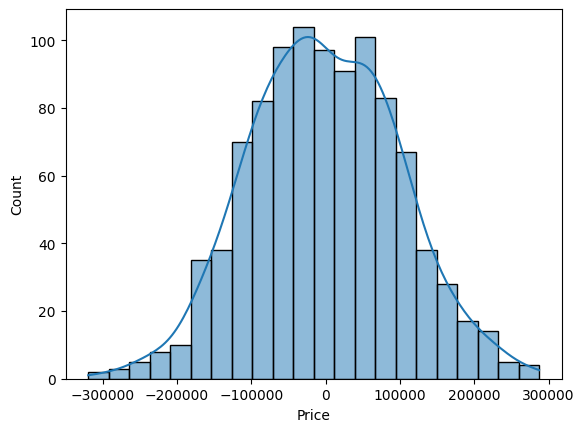

In [20]:
sns.histplot(residual, kde=True) #distributed plot to check bull curve

# As height of bars are high, so we are far from zero, means our model is not correct

In [21]:
# ScoreIt

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("Linear Regression: MSE")
print ('- -' * 10)
print("mse: ", mse)
print("root of mse, rmse: ", rmse)

Linear Regression: MSE
- -- -- -- -- -- -- -- -- -- -
mse:  10100187856.998734
root of mse, rmse:  100499.69083036392
